<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 36px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  LAB-02: LÀM VIỆC VÀ TRỰC QUAN HÓA DỮ LIỆU CHUỖI THỜI GIAN<Title>
</div>

<h2>Nhóm 23</h2>
<h3>Thông tin nhóm:</h3>


<center>

| HỌ TÊN                | MSSV      |
|:------------------    |:--------: |
| Lê Công Đắt     | 20120454  |
| Lê Trần Minh Khuê     | 21120279  |
| Hoàng Trung Nam       | 21120290  |
| Lê Trần Như Ngọc       | 21120296  |
| Lê Thị Minh Phương | 21120533  |

</center>


<h2>Giảng viên hướng dẫn:</h2>

### **Thầy Lê Nhựt Nam**

<h2>Chủ đề:</h2>

## ***Phân tích và trực quan giá cổ phiếu của top 6 ngân hàng có giá trị thương hiệu tốt nhất Việt Nam***

---


## **Phần B: Khám phá và tiền xử lý dữ liệu.**

### **I. Chuẩn bị**

#### 1. Nhập các thư viện

In [22]:
# Nhập các thư viện cần dùng
import numpy as np
import pandas as pd
import warnings

# Bỏ qua tất cả các cảnh báo
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
import seaborn as sns

import plotly.express as px
import plotly.subplots as sp

#### 2. Nhập các file dữ liệu vào notebook

Vì dữ liệu được lưu trữ theo từng ngân hàng riêng biệt, nên ta sẽ đọc từng file lại, tiền xử lý và sau đó gộp lại 1 file sau cùng.

In [23]:
path = "./Data/Raw/"
stock_symbol = ['VCB','BID','CTG','TCB','AGR','VPB']
df =[]
for bank in stock_symbol:
    raw_df = pd.read_csv(path + bank +' Historical Data.csv')
    df.append(raw_df)

VCB_df = df[0]
BID_df = df[1]
CTG_df = df[2]
TCB_df = df[3]
AGR_df = df[4]
VPB_df = df[5]

In [24]:
# Thêm cột "Stock symbol" với giá trị là Mã cổ phiếu tương ứng của ngân hàng
VCB_df['Stock symbol'] = 'VCB'
BID_df['Stock symbol'] = 'BID'
CTG_df['Stock symbol'] = 'CTG'
TCB_df['Stock symbol'] = 'TCB'
AGR_df['Stock symbol'] = 'AGR'
VPB_df['Stock symbol'] = 'VPB'

# Thêm cột "Bank" với giá trị tên ngân hàng tương ứng
VCB_df['Bank'] = 'Vietcombank'
BID_df['Bank'] = 'BIDV'
CTG_df['Bank'] = 'VietinBank'
TCB_df['Bank'] = 'Techcombank'
AGR_df['Bank'] = 'Agribank'
VPB_df['Bank'] = 'VPBank'

# Gộp tất cả các DataFrame vào một DataFrame duy nhất
full_df = pd.concat([VCB_df, BID_df, CTG_df, TCB_df, AGR_df, VPB_df], ignore_index=True)

# Hiển thị DataFrame kết quả
full_df

,Date,Price,Open,High,Low,Vol.,Change %,Stock symbol,Bank
0,05/24/2024,"90,200","91,000","91,000","90,000",2.24M,-0.88%,VCB,Vietcombank
1,05/23/2024,"91,000","90,700","91,500","90,500",1.32M,0.33%,VCB,Vietcombank
2,05/22/2024,"90,700","91,500","91,700","90,700",1.35M,-0.44%,VCB,Vietcombank
3,05/21/2024,"91,100","91,900","92,000","90,700",1.49M,-0.87%,VCB,Vietcombank
4,05/20/2024,"91,900","92,300","93,000","91,800",1.04M,0.11%,VCB,Vietcombank
...,...,...,...,...,...,...,...,...,...
16774,08/24/2017,"7,834.8","7,856.4","7,856.4","7,737.5",3.14M,0.14%,VPB,VPBank
16775,08/23/2017,"7,823.9","7,780.7","7,953.6","7,726.7",2.41M,0.56%,VPB,VPBank
16776,08/22/2017,"7,780.7","7,521.4","7,780.7","7,521.4",10.62M,0.42%,VPB,VPBank
16777,08/21/2017,"7,748.3","7,737.5","7,953.6","7,672.7",3.70M,-3.63%,VPB,VPBank


### **II. Khám phá dữ liệu**

In [25]:
print(f"Dữ liệu thô có {full_df.shape[0]} dòng và {full_df.shape[1]} cột.")

Dữ liệu thô có 16779 dòng và 9 cột.


#### 1. Mỗi dòng có ý nghĩa gì? Có vấn đề các dòng có ý nghĩa khác nhau không?

In [26]:
full_df.sample(7)

,Date,Price,Open,High,Low,Vol.,Change %,Stock symbol,Bank
3475,06/18/2010,"11,974","11,974","12,243","11,974",1.82M,-0.99%,VCB,Vietcombank
7690,10/12/2018,"18,938.0","18,043.3","18,938.0","17,968.8",6.96M,3.25%,CTG,VietinBank
660,09/29/2021,"76,258","77,032","77,032","75,484",720.94K,-0.71%,VCB,Vietcombank
14934,07/30/2010,"11,868.9","11,539.2","12,033.8","11,539.2",46.59K,1.41%,AGR,Agribank
15410,02/13/2023,"15,385.4","15,928.4","15,973.6","15,023.4",25.78M,-2.86%,VPB,VPBank
582,01/18/2022,"87,600","85,500","87,600","84,000",1.70M,1.62%,VCB,Vietcombank
8674,11/03/2014,"9,594.3","9,660.0","9,660.0","9,594.3",655.53K,-0.68%,CTG,VietinBank


Ta thấy, mỗi dòng dữ liệu đều thể hiện thông tin về giá chứng khoán của ngân hàng trong một ngày cụ thể. Không có sự khác biệt trong ý nghĩa của các dòng.
Tuy nhiên, cần xem xét thêm có sự trùng lặp nào ở các dòng hay không.

In [27]:
if len(full_df[full_df.duplicated()]) == 0:
    print(f'Không có dòng nào trùng lặp trong dữ liệu.')
else:
    print('Tồn tại dòng bị trùng lặp trong dữ liệu.')

Không có dòng nào trùng lặp trong dữ liệu.


#### 2. Mỗi cột có ý nghĩa gì?

Các cột và thông tin tương ứng:
- `Date`: Ngày ghi nhận thông tin (đóng vai trò là index khi nằm ở các dataframe của từng ngân hàng).

- `Price`: Giá tham chiếu của ngày đang đề cập, tạm xem như giá đóng cửa (Close price - giá trung bình của các lệnh khớp trong 15p cuối phiên, thường là 14h30-14h45p).

- `Open`: Giá phiên khớp lệnh mở cửa (Được ghi nhận sau phiên khớp lệnh đầu ngày từ 9h00 - 9h15 các ngày thứ 2 đến thứ 6).

- `High`: Giá cao nhất trong phiên giao dịch của ngày đang đề cập.

- `Low`: Giá thấp nhất trong phiên giao dịch của ngày đang đề cập.

- `Vol.`: Khối lượng giao dịch - Tổng số cổ phiếu được mua và bán trong một phiên giao dịch

- `Change %`: Biến động giá - sự thay đổi giá cổ phiếu so với giá tham chiếu (trong ngữ cảnh này thể hiện sự thay đổi của Price ngày hiện tại so với price ngày liền trước.)

#### 3. Mỗi cột hiện có kiểu dữ liệu gì? Có cột nào có kiểu dữ liệu chưa phù hợp cần xử lý tiếp hay không?

In [28]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16779 entries, 0 to 16778
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Date          16779 non-null  object
 1   Price         16779 non-null  object
 2   Open          16779 non-null  object
 3   High          16779 non-null  object
 4   Low           16779 non-null  object
 5   Vol.          16779 non-null  object
 6   Change %      16779 non-null  object
 7   Stock symbol  16779 non-null  object
 8   Bank          16779 non-null  object
dtypes: object(9)
memory usage: 1.2+ MB


Ta thấy toàn bộ các cột đều thuộc kiểu object. Trong khi dựa trên định nghĩa (loại trừ cột Stock symbol và Bank), chúng phải thuộc kiểu số (hoặc kiểu datetime nếu là cột Date). Vậy nên ta cần tiền xử lý một chút tại đây. Trước hết, ta in ngẫu nhiên 1 dòng ra để xem xét:

In [29]:
full_df.sample(5)

,Date,Price,Open,High,Low,Vol.,Change %,Stock symbol,Bank
562,02/22/2022,"86,800","87,000","87,000","85,000",1.54M,-0.69%,VCB,Vietcombank
8447,10/05/2015,"13,793.5","13,586.6","13,862.5","13,517.6",1.46M,2.56%,CTG,VietinBank
10451,07/26/2022,"36,600.0","36,800.0","37,050.0","36,550.0",2.79M,-0.54%,TCB,Techcombank
16129,03/27/2020,"7,240.8","7,259.3","7,277.9","6,963.0",12.90M,-0.25%,VPB,VPBank
11605,11/30/2023,"15,400.0","15,600.0","15,850.0","15,400.0",2.13M,-1.28%,AGR,Agribank


Ta thấy, lý do các cột đều đang ở dạng object có thể là vì chúng tồn tại các ký tự đặc biệt trong giá trị. Cụ thể
- Các cột `Price, Open, High, Low` tồn tại dấu "," => Ta xoá dấu này đi và chuyển sang float.
- Cột `Vol.` có ký tự cuối cùng là "M" hoặc "K" để thể hiện đơn vị, với M là tương ứng với triệu và K ứng với nghìn. => ta sẽ chuyển đổi thành số tương ứng.
- Cột `Change %` còn tồn tại "%" => Xoá % và chuyển về float.


In [30]:
# Hàm để chuyển đổi giá trị trong cột "Vol."
def convert_volume(vol_str):
    if vol_str.endswith('M'):
        return float(vol_str[:-1]) * 1000000
    elif vol_str.endswith('K'):
        return float(vol_str[:-1]) * 1000
    else:
        return float(vol_str)

def preprocessing(df):
    df['Date'] = pd.to_datetime(df['Date'])
    # Loại bỏ dấu phẩy từ cột Price, Open, High, Low
    df['Price'] = df['Price'].str.replace(',', '').astype(float)
    df['Open'] = df['Open'].str.replace(',', '').astype(float)
    df['High'] = df['High'].str.replace(',', '').astype(float)
    df['Low'] = df['Low'].str.replace(',', '').astype(float)

    # Loại bỏ dấu % từ cột 'Change %'
    df['Change %'] = df['Change %'].str.replace('%', '').astype(float)

    # Sửa cột "Vol" trong DataFrame
    df['Vol.'] = df['Vol.'].apply(convert_volume)

    # Sắp xếp cột 'Date' theo thứ tự tăng dần
    df = df.sort_values(by='Date')

    return df

In [31]:
# Áp dụng tiền xử lý cho data đã hợp nhất
full_df = preprocessing(full_df)

# Áp dụng tiền xử lý cho từng ngân hàng - Phòng hờ cần sử dụng về sau.
VCB_df = preprocessing(VCB_df)
BID_df = preprocessing(BID_df)
CTG_df = preprocessing(CTG_df)
TCB_df = preprocessing(TCB_df)
AGR_df = preprocessing(AGR_df)
VPB_df = preprocessing(VPB_df)

# Xem vài dòng của full_df sau xử lý
full_df.sample(5)

,Date,Price,Open,High,Low,Vol.,Change %,Stock symbol,Bank
2344,2014-12-29,16716.0,16294.0,16927.0,16242.0,2440000.0,2.92,VCB,Vietcombank
700,2021-08-02,75096.0,75096.0,76413.0,74632.0,1640000.0,-1.02,VCB,Vietcombank
4392,2021-09-09,31498.9,31340.6,31498.9,31301.0,1060000.0,0.51,BID,BIDV
11461,2018-07-12,26000.0,25100.0,26000.0,25100.0,686180.0,0.97,TCB,Techcombank
10498,2022-05-20,35700.0,35800.0,36450.0,35350.0,5440000.0,-0.28,TCB,Techcombank


Xem lại kiểu dữ liệu của từng cột sau khi xử lý.

In [32]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 16779 entries, 3717 to 0
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          16779 non-null  datetime64[ns]
 1   Price         16779 non-null  float64       
 2   Open          16779 non-null  float64       
 3   High          16779 non-null  float64       
 4   Low           16779 non-null  float64       
 5   Vol.          16779 non-null  float64       
 6   Change %      16779 non-null  float64       
 7   Stock symbol  16779 non-null  object        
 8   Bank          16779 non-null  object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 1.3+ MB


> Ngoài ra, để đảm bảo so sánh công bằng cho các ngân hàng, nhóm sẽ lấy dữ liệu ở cùng 1 khoảng thời gian (tại đây nhóm chọn khoảng thời gian mà tất cả các ngân hàng đều có dữ liệu). Do Techcombank lên sàn muộn nhất, nên nhóm sẽ lấy từ thời gian lên sàn của ngân hàng này trở về sau (tức sau ngày 4/6/2018).

In [33]:
# Loại bỏ các dòng từ ngày 4/6/2018 trở về trước
full_df = full_df[full_df['Date'] >= pd.Timestamp(2018, 6, 4)]
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8963 entries, 16584 to 0
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          8963 non-null   datetime64[ns]
 1   Price         8963 non-null   float64       
 2   Open          8963 non-null   float64       
 3   High          8963 non-null   float64       
 4   Low           8963 non-null   float64       
 5   Vol.          8963 non-null   float64       
 6   Change %      8963 non-null   float64       
 7   Stock symbol  8963 non-null   object        
 8   Bank          8963 non-null   object        
dtypes: datetime64[ns](1), float64(6), object(2)
memory usage: 700.2+ KB


#### 4. Với mỗi cột, các giá trị (dạng số, dạng phân loại) được phân bố như thế nào?

##### 4.1. Các cột dạng số

In [34]:
numerical_columns = full_df.select_dtypes(include=['int64', 'float64']).columns
print("Numerical columns:", numerical_columns)
full_df.describe()

Numerical columns: Index(['Price', 'Open', 'High', 'Low', 'Vol.', 'Change %'], dtype='object')


,Date,Price,Open,High,Low,Vol.,Change %
count,8963,8963.000000,8963.000000,8963.000000,8963.000000,8.963000e+03,8963.000000
mean,2021-05-26 03:37:03.139573504,30525.251132,30523.695013,30930.470523,30124.474484,6.059336e+06,0.078466
min,2018-06-04 00:00:00,2165.300000,2214.500000,2303.100000,2145.600000,8.500000e+03,-14.920000
25%,2019-11-26 00:00:00,16067.500000,16083.750000,16328.500000,15806.500000,1.220000e+06,-1.000000
50%,2021-05-28 00:00:00,25639.000000,25633.300000,25983.800000,25281.600000,2.630000e+06,0.000000
75%,2022-11-21 00:00:00,38956.000000,38995.250000,39450.000000,38550.000000,7.465000e+06,1.150000
max,2024-05-24 00:00:00,97400.000000,98500.000000,100500.000000,97300.000000,2.067700e+08,7.000000
std,NaN,21264.620570,21255.186079,21471.892262,21036.732196,9.835374e+06,2.286702


In [35]:
figure1 = px.box(full_df["Price"])
figure2 = px.box(full_df["Open"])
figure3 = px.box(full_df["High"])
figure4 = px.box(full_df["Low"])
figure5 = px.box(full_df["Vol."])
figure6 = px.box(full_df["Change %"])

figures = [figure1, figure2, figure3, figure4,figure5,figure6]
 
figure1_traces = []
figure2_traces = []
figure3_traces = []
figure4_traces = []
figure5_traces = []
figure6_traces = []

figure_traces = [figure1_traces,figure2_traces,figure3_traces,figure4_traces,figure5_traces,figure6_traces]

for (figure, figure_trace) in zip(figures,figure_traces):
    for trace in range(len(figure["data"])):
        figure_trace.append(figure["data"][trace])

# Create a 1x2 subplot
this_figure = sp.make_subplots(rows = 2, cols = 3)
this_figure.update_layout(height = 700, width = 1000, title_text = "Boxplot cho từng cột dạng số", title_font_size = 25)
row = 1
count = 1
# Get the Express fig broken down as traces and add the traces to the proper plot within the subplot
for figure_trace in figure_traces:
    for traces in figure_trace:
        this_figure.append_trace(traces, row = row, col = count)
    count += 1
    if count >3:
        row = 2 
        count =1
this_figure.show()

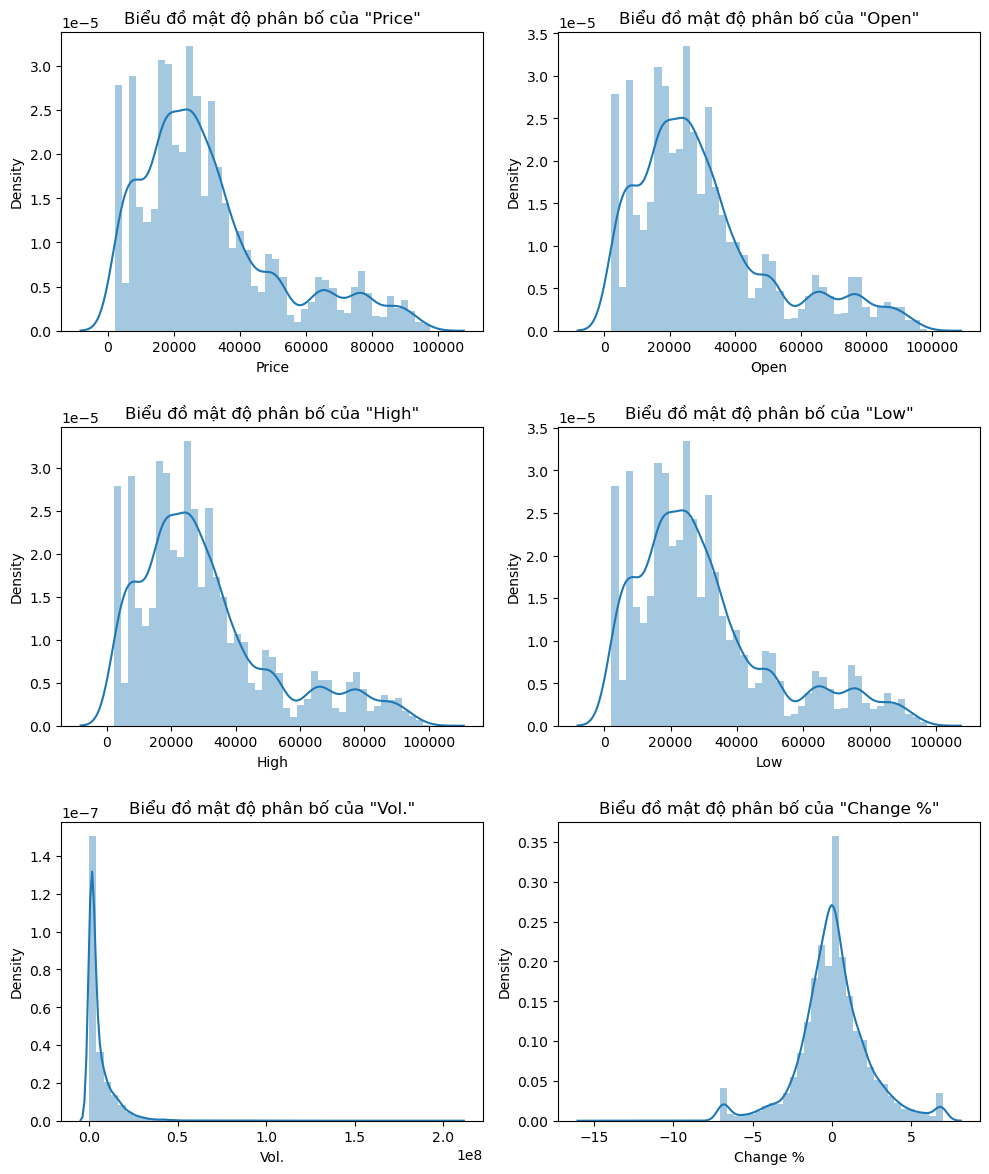

In [36]:
plt.figure(figsize=(10 , 12))
count = 1
for col in numerical_columns:
    ax = plt.subplot(3, 2, count)
    sns.distplot(full_df[col])
    ax.set_title(f"Biểu đồ mật độ phân bố của \"{col}\"")
    count+=1
plt.tight_layout()
plt.show()

### Nhận xét từ sự phân bố của các cột dạng số
#### 1. Nhóm biểu đồ `Price`,`Open`,`High`,`Low`  
**Phân Tích Biểu đồ Boxplot**
- **Trung Vị và IQR:** 
  - Giá trị trung vị của cả 4 biến số này đều nằm khoảng 30,000 đồng.
  - Khoảng giá trị giữa các tứ phân vị (IQR) cũng tương tự nhau, từ 20,000 đến 40,000 đồng.
- **Ngoại Lệ:** 
  - Tất cả các biến số đều có một số giá trị ngoại lệ cao hơn mức bình thường, vượt qua ngưỡng 80,000 đồng. Điều này cho thấy rằng một số phiên giao dịch có mức giá cao đột biến, có thể do các ngân hàng có cổ phiếu giá cao hơn mặt bằng chung.

**Phân Tích Biểu Đồ Phân Bố**
- **Phân Bố:** 
  - Cả 4 biến số đều có phân bố lệch phải, với đa số giá trị tập trung trong khoảng từ 20,000 đến 40,000 đồng.
  - Một số đỉnh nhỏ xuất hiện ở các mức giá cao hơn, thể hiện sự dao động trong giá cổ phiếu của các ngân hàng.
- **Ngoại Lệ:** 
  - Một số giá trị vượt quá 80,000 đồng, khẳng định rằng có một hoặc một vài ngân hàng có mức giá cổ phiếu cao hơn đáng kể so với phần lớn các ngân hàng khác.

### Insight Chung
- **Sự Tương Đồng:** 
  - Các biến số Price, Open, High, và Low đều có xu hướng và phân bố tương tự nhau, cho thấy rằng mức giá cổ phiếu chung, giá mở cửa, giá cao nhất và giá thấp nhất trong ngày của các ngân hàng này đều dao động trong khoảng tương đối giống nhau.
- **Ngoại Lệ:** 
  - Sự hiện diện của các giá trị ngoại lệ cao hơn bình thường có thể do một hoặc một vài ngân hàng có giá cổ phiếu cao hơn mặt bằng chung. Điều này phản ánh sự khác biệt về giá trị và niềm tin của nhà đầu tư vào các ngân hàng khác nhau.
- **Ổn Định:** 
  - Phân bố giá cổ phiếu tương đối ổn định, với phần lớn giá trị nằm trong khoảng 20,000 đến 40,000 đồng, cho thấy rằng thị trường cổ phiếu của các ngân hàng lớn ở Việt Nam trong giai đoạn này tương đối ổn định, mặc dù có những sự biến động nhất định.

#### 2. **Vol. (Khối lượng giao dịch):**
   - **Boxplot:** Trung vị khối lượng giao dịch khoảng 5,000,000 với IQR từ 2,500,000 đến 10,000,000. Có nhiều giá trị ngoại lệ, đặc biệt ở mức khối lượng rất cao.
   - **Biểu đồ phân bố:** Phân bố lệch phải mạnh, với đa số giá trị ở mức khối lượng thấp dưới 10,000,000 và nhiều giá trị ngoại lệ ở mức khối lượng rất cao.
   - **Insight:** Khối lượng giao dịch cao có thể phản ánh sự quan tâm lớn từ nhà đầu tư vào một số ngân hàng cụ thể trong những thời điểm nhất định.

#### 3. **Change % (Thay đổi %):**
   - **Boxplot:** Trung vị thay đổi % khoảng 0% với IQR từ -2% đến 2%. Có một số giá trị ngoại lệ ở cả hai phía.
   - **Biểu đồ phân bố:** Phân bố gần như chuẩn, với đa số giá trị tập trung quanh mức 0% và một số giá trị ngoại lệ vượt quá -10% và 5%.
   - **Insight:** Biến động % thay đổi thường ngày có xu hướng ổn định, nhưng có một số ngày biến động mạnh, có thể do các sự kiện đặc biệt hoặc thông tin ảnh hưởng đến ngân hàng đó.


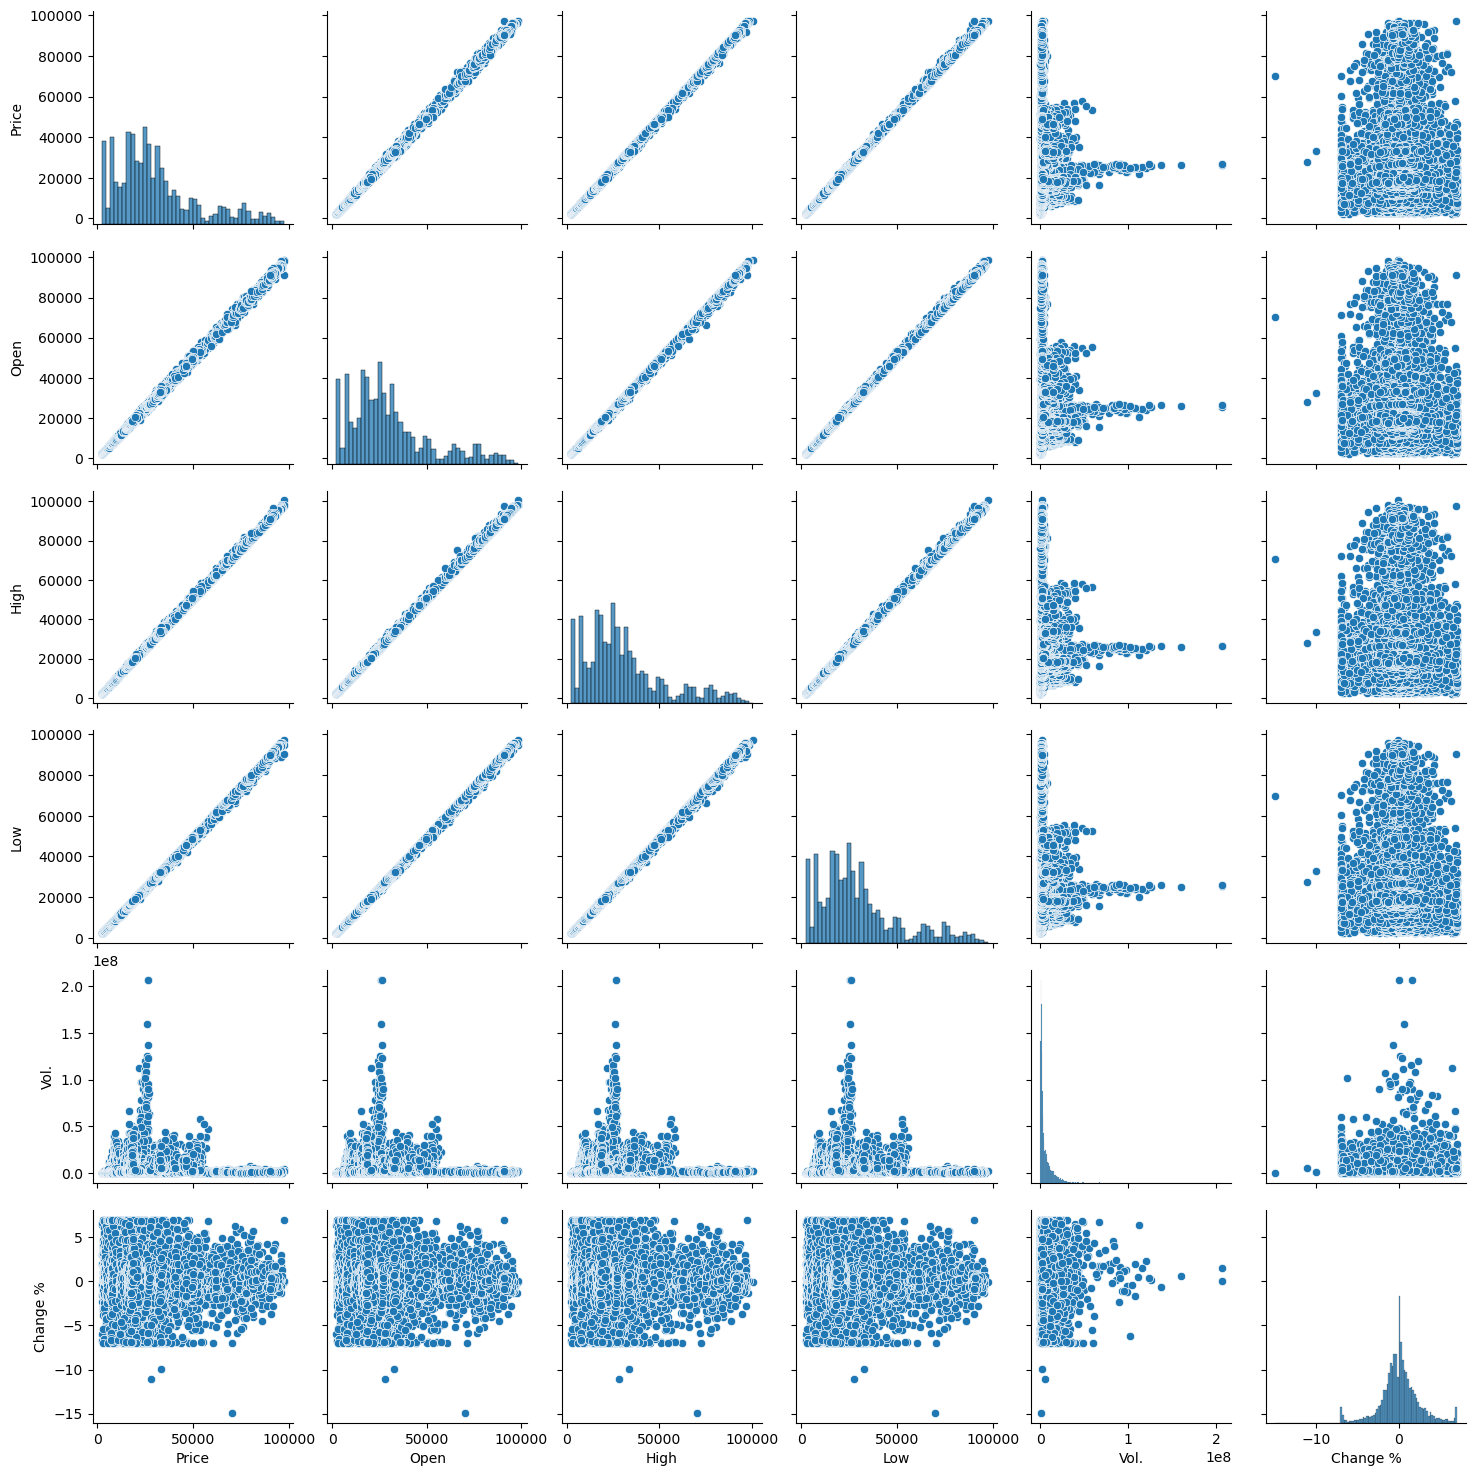

In [37]:
sns.pairplot(full_df[numerical_columns])
plt.show()

Ta thấy các cột Price, Open, High, Low có sự tương quan vô cùng mạnh mẽ với nhau.

##### 4.2. Các cột dạng phân loại

In [38]:
categorical_columns = full_df.select_dtypes(include=['object']).columns
categorical_columns

Index(['Stock symbol', 'Bank'], dtype='object')

In [39]:
def calculate_column_profile(column):
    missing_ratio = len(column[column.isna()]) * 100 / len(column)
    num_diff_vals = len(column.dropna().unique())
    diff_vals = column.dropna().unique()
    return pd.Series([missing_ratio, num_diff_vals, diff_vals], index=['missing_ratio', 'num_diff_vals', 'diff_vals'])

cate_col_profiles_df = full_df[categorical_columns].agg(calculate_column_profile)
cate_col_profiles_df

,Stock symbol,Bank
missing_ratio,0.0,0.0
num_diff_vals,6,6
diff_vals,"[VPB, VCB, BID, AGR, CTG, TCB]","[VPBank, Vietcombank, BIDV, Agribank, VietinBa..."


#### 5. Có cần phải tiền xử lý dữ liệu hay không và nếu có thì nhóm cần phải xử lý như thế nào?


Tạm thời chưa cần xử lý gì thêm

In [40]:
print(f"Dữ liệu sau xử lý có {full_df.shape[0]} dòng và {full_df.shape[1]} cột.")

Dữ liệu sau xử lý có 8963 dòng và 9 cột.


Nhóm tiến hành xuất các file ra thư mục data để dùng cho các bước kế tiếp.

In [41]:
full_df.to_csv("./Data/full_data_processed.csv", index=False)

In [42]:
VCB_df.to_csv("./Data/Processed/VCB.csv", index=False)
BID_df.to_csv("./Data/Processed/BID.csv", index=False)
CTG_df.to_csv("./Data/Processed/CTG.csv", index=False)
TCB_df.to_csv("./Data/Processed/TCB.csv", index=False)
AGR_df.to_csv("./Data/Processed/AGR.csv", index=False)
VPB_df.to_csv("./Data/Processed/VPB.csv", index=False)